In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("\\Users\\Lenovo\\Desktop\\Gen Ai 2\\Data\\All Dataset\\Budget_-_2026_Budget_Recommendations_-_Revenue.csv")

In [5]:
df.head()

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
0,0100,Corporate Fund,Intergovernmental Revenue,Municipal Auto Rental Tax,Municipal Auto Rental Tax,4894443
1,0100,Corporate Fund,Intergovernmental Revenue,Personal Property Replacement Tax,Personal Property Replacement Tax,202567148
2,0100,Corporate Fund,Intergovernmental Revenue,Reimbursements for City Services,Reimbursements for City Services,1143491
3,0100,Corporate Fund,Intergovernmental Revenue,State Income Tax,State Income Tax,545129731
4,0100,Corporate Fund,Local Non-Tax Revenue,"Licenses, Permits, and Certificates",Alcohol Dealers' License,17328661


In [6]:
df.tail()

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
149,0D43,Neighborhoods Opportunity Fund,NaN,NaN,Building Permits,2787098
150,0D43,Neighborhoods Opportunity Fund,NaN,NaN,Interest,1795086
151,0D43,Neighborhoods Opportunity Fund,NaN,NaN,Land Sale Proceeds,3767510
152,0D44,Citywide Adopt-a-landmark Fund,NaN,NaN,Building Permits,395145
153,0D45,Local Impact Fund,NaN,NaN,Building Permits,395145


In [7]:
df.shape

(154, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FUND_CODE           154 non-null    object
 1   FUND_NAME           154 non-null    object
 2   REVENUE_GROUP_TYPE  52 non-null     object
 3   REVENUE_CATEGORY    52 non-null     object
 4   REVENUE_SOURCE      154 non-null    object
 5   ESTIMATED_REVENUE   154 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 7.3+ KB


In [9]:
df.describe(include = "all")

,FUND_CODE,FUND_NAME,REVENUE_GROUP_TYPE,REVENUE_CATEGORY,REVENUE_SOURCE,ESTIMATED_REVENUE
count,154,154,52,52,154,1.540000e+02
unique,37,37,4,19,100,NaN
top,0100,Corporate Fund,Local Tax,Recreation Taxes,Interest,NaN
freq,52,52,24,9,8,NaN
mean,NaN,NaN,NaN,NaN,NaN,9.313196e+07
std,NaN,NaN,NaN,NaN,NaN,2.281755e+08
min,NaN,NaN,NaN,NaN,NaN,9.800000e+03
25%,NaN,NaN,NaN,NaN,NaN,3.525925e+06
50%,NaN,NaN,NaN,NaN,NaN,1.447063e+07
75%,NaN,NaN,NaN,NaN,NaN,6.424702e+07


 **FUND_CODE**-
- the count in the FUND_CODE **feature is 154** it has no missing value
- in this feature there are **37 unique value**
- **Fund code 0100** is the most **frequent code** which has been **repeated 52 time**
  
**FUND_NAME**-
- the count in Fund Name **feature is 154** it has also no missing values
-  An in this feature there are also **37 unique value**
-  **Corporate Fund**  is the most **frequent Name** which has been **repeated 52 times**

**REVENUE_GROUP_TYPE**-
- the count in the REVENUE_GROUP_TYPE **feature is 52** it have **102 missing values**
- In tohis feature there are **4 unique values**
- **Local Tax** is the most **frequant Revenue Group Type** Which have **repeated upto 24 times** in this data Frame

**REVENUE_CATEGORY**-
- the count in REVENUE_CATEGORY **feature is 52** it have also **102 missing values**
- In this feature there are **9 unique value**
- **Recreation Taxes** is the most **frequent category, appearing 9 times.**

**REVENUE_SOURCE**-
- The count in **REVENUE_SOURCE is 154** with no missing value
- There are **100 unique revenue sources**
- **Interest** is the most frequent revenue source **appearing 8 times**

**ESTIMATED_REVENUE**-
- The count in **ESTIMATED_REVENUE is 154** with no missing values
- The **minimum revenue is 9.8k** and the **maximum revenue is 2,0cr**
- The **mean revenue is approximately 9.3cr**
- **The median revenue is 1.4cr** and the **standard deviation is 2.2cr** showing high variability.

In [10]:
df.isnull().sum()

FUND_CODE               0
FUND_NAME               0
REVENUE_GROUP_TYPE    102
REVENUE_CATEGORY      102
REVENUE_SOURCE          0
ESTIMATED_REVENUE       0
dtype: int64

In [11]:
df['REVENUE_GROUP_TYPE'] = df['REVENUE_GROUP_TYPE'].ffill() 

In [12]:
df['REVENUE_CATEGORY'] = df['REVENUE_CATEGORY'].ffill() 

In [13]:
df.duplicated().sum()

0

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

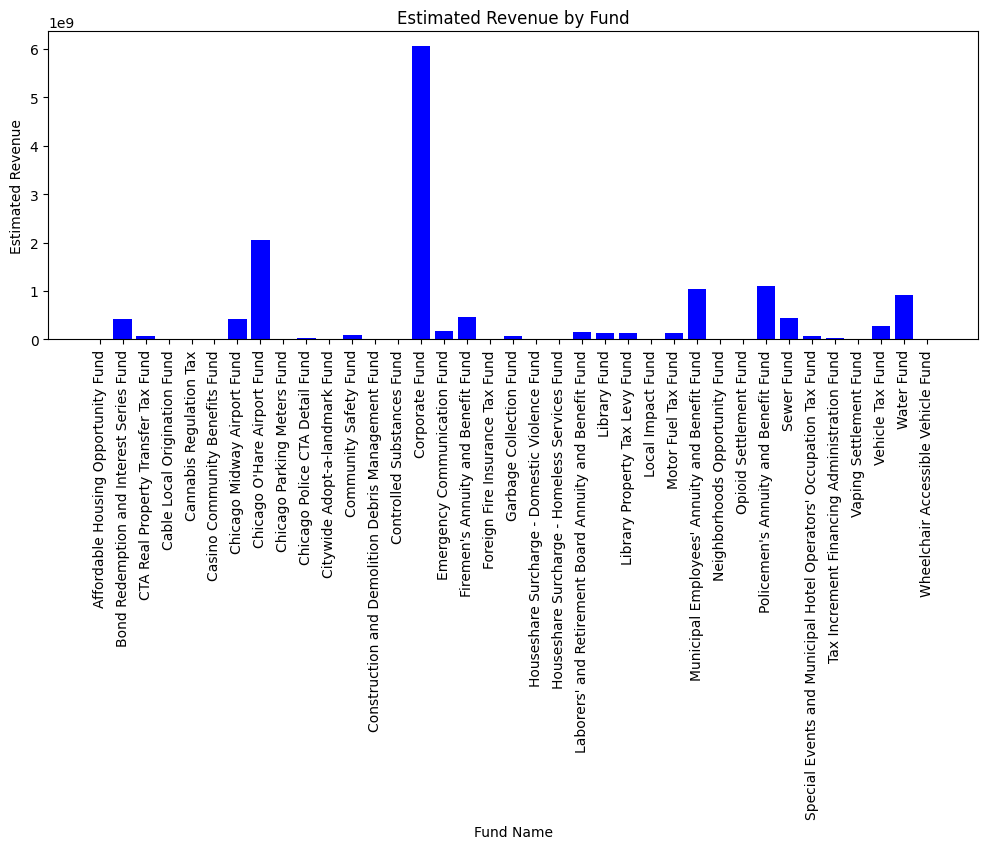

In [15]:
fund_revenue = df.groupby('FUND_NAME')['ESTIMATED_REVENUE'].sum()
plt.figure(figsize=(12, 4))
plt.bar(fund_revenue.index,fund_revenue.values, color='blue')
plt.title('Estimated Revenue by Fund')
plt.xlabel('Fund Name')
plt.ylabel('Estimated Revenue')
plt.xticks(rotation=90) 
plt.show()

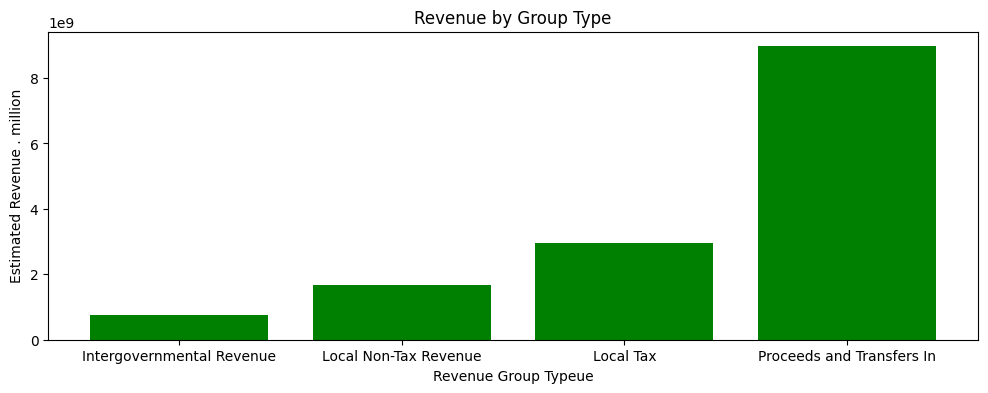

In [16]:
group_type_revenue = df.groupby('REVENUE_GROUP_TYPE')['ESTIMATED_REVENUE'].sum()
plt.figure(figsize=(12,4))
plt.bar(group_type_revenue.index,group_type_revenue.values, color='green')
plt.title('Revenue by Group Type')
plt.xlabel('Revenue Group Typeue')
plt.ylabel('Estimated Revenue . million')
plt.show()

- This bar chart shows the revenue by group type
- Proceeds and Transfers In has the highest revenue among all groups
- Local Tax is the second highest revenue source
- Local Non-Tax Revenue and Intergovernmental Revenue have much lower values
- This graph shows a left skewed distribution, because most revenue is concentrated on the right side with one very high value

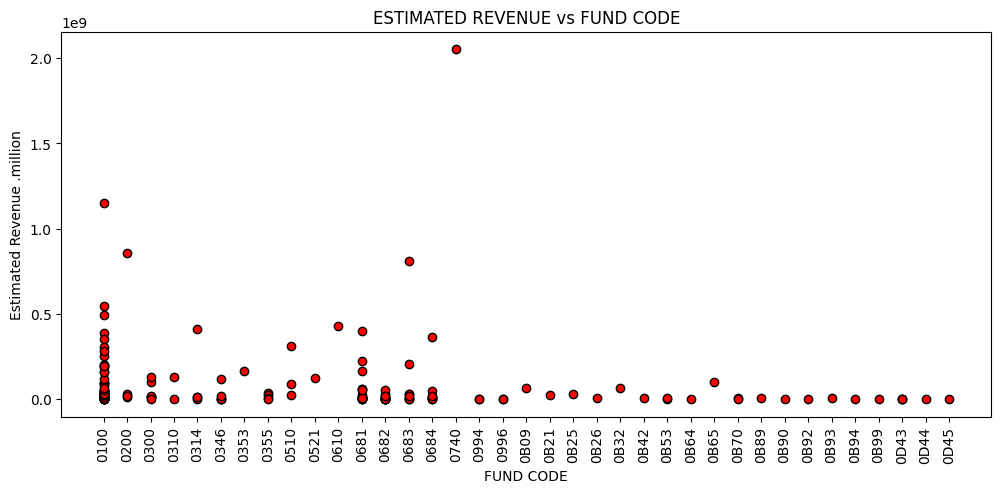

In [17]:
#funcode_revenue = df.groupby('FUND_CODE')['ESTIMATED_REVENUE'].sum()
plt.figure(figsize=(12, 5))
plt.scatter(df["FUND_CODE"],df["ESTIMATED_REVENUE"], color='red',edgecolor = "black")
plt.title('ESTIMATED REVENUE vs FUND CODE')
plt.xlabel('FUND CODE')
plt.ylabel('Estimated Revenue .million')
plt.xticks(rotation=90) 
plt.show()

- This scatter plot shows the relation between fund codes and their estimated revenue
- Most fund codes have low estimated revenue
- A few fund codes have very high revenue that appear as high points on the graph
- This shows that only some funds perform good but  most perform at a normal level

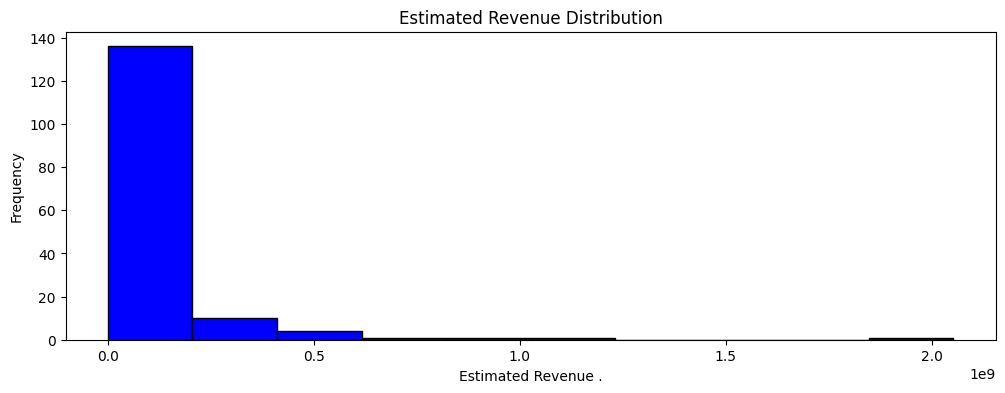

In [18]:
plt.figure(figsize=(12, 4))
plt.hist(df['ESTIMATED_REVENUE'], color='blue', edgecolor='black')
plt.title('Estimated Revenue Distribution')
plt.xlabel('Estimated Revenue .')
plt.ylabel('Frequency') 
plt.show()

- This graph shows a **right-skewed** distribution
- The most frequent **range is from 0 to 0.5 million** and the **maximum value is close to 2.0 million**
- The **minimum value is likely close to 0**
- Outliers are **present in very high revenue values**

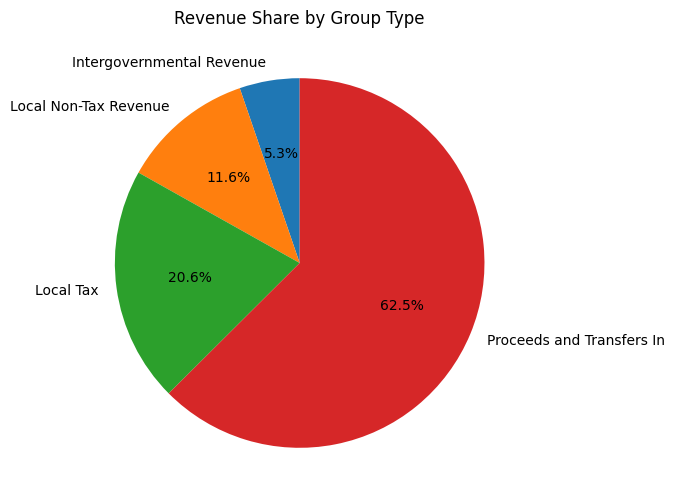

In [19]:
group_sum = df.groupby('REVENUE_GROUP_TYPE')['ESTIMATED_REVENUE'].sum()
plt.figure(figsize=(6, 6))
plt.pie(group_sum.values, labels=group_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Group Type')
plt.show()

**This pie chart shows in**-

**Proceeds and Transfers**-
- **Proceeds and Transfers** In hold the **largest slice of revenue at 62.5%**
  
**Intergovernmental Revenue**-
- **Intergovernmental Revenue** contributes a **smaller slice of revenue at 5.3% only**

**Local Non-Tax Revenue**-  
- **Local Non-Tax Revenue** makes up a **share of revenue at 11.6%**

**Local Tax**- 
- **Local Tax** represents a **share of revenue at 20.6%**

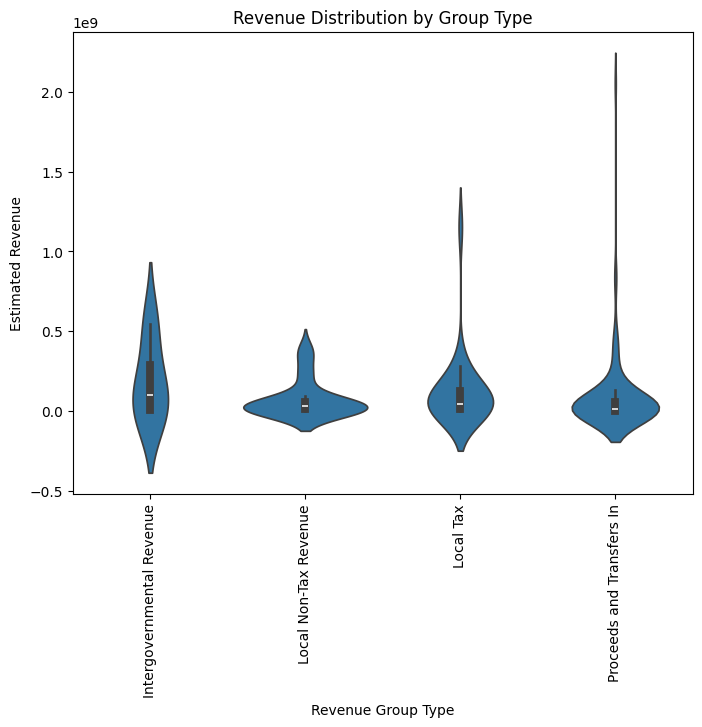

In [20]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x='REVENUE_GROUP_TYPE', y='ESTIMATED_REVENUE')
plt.title('Revenue Distribution by Group Type')
plt.xlabel('Revenue Group Type')
plt.ylabel('Estimated Revenue')
plt.xticks(rotation=90)
plt.show()